<a href="https://colab.research.google.com/github/kumagaimasahito/Tech/blob/master/programming/20200810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
import json
import matplotlib.pyplot as plt

In [2]:
url = 'http://api.e-stat.go.jp/rest/2.1/app/json/getStatsData?appId=&lang=J&statsDataId=0003281500&metaGetFlg=Y&cntGetFlg=N&sectionHeaderFlg=1'
with urllib.request.urlopen(url) as response:
    data = response.read()
d = json.loads(data.decode())

In [8]:
def get_data(unit="件",tab="1010"):
    x = []
    y = []
    for value in d["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]:
        if value["@unit"] == unit and value["@tab"] == tab:
            x.append(float(value["@time"])/1000000)
            y.append(float(value["$"]))
    return x,y

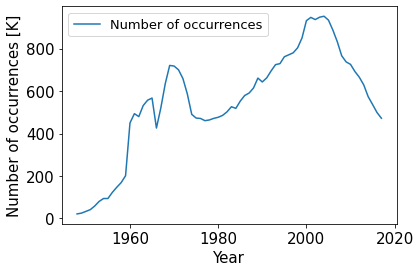

In [20]:
x,y = get_data(unit="件",tab="1010")

plt.plot(x,list(map(lambda i: i/1000,y)),label="Number of occurrences")
plt.tick_params(labelsize=15)
plt.legend(fontsize=13)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of occurrences [K]", fontsize=15)
plt.show()

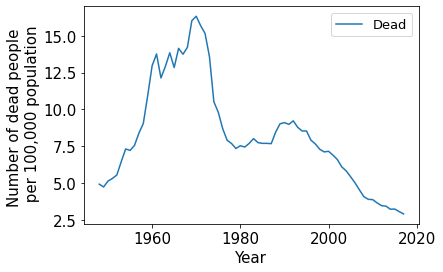

In [19]:
x_d,y_d = get_data(unit="人",tab="1470")
#x_i,y_i = get_data(unit="人",tab="1190")

plt.plot(x_d,y_d,label="Dead")
#plt.plot(x_i,y_i,label="Injured")
plt.tick_params(labelsize=15)
plt.legend(fontsize=13)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of dead people \n per 100,000 population", fontsize=15)
plt.show()

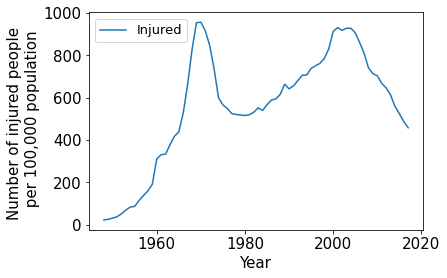

In [21]:
x_i,y_i = get_data(unit="人",tab="1480")
#x_si,y_si = get_data(unit="人",tab="1250")

plt.plot(x_i,y_i,label="Injured")
#plt.plot(x_si,y_si,label="Seriously Injured")
plt.tick_params(labelsize=15)
plt.legend(fontsize=13)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of injured people \n per 100,000 population", fontsize=15)
plt.show()

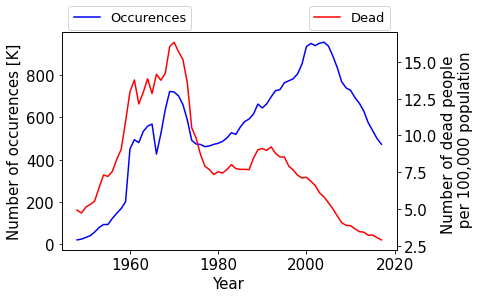

In [22]:
fig, ax1 = plt.subplots()
ax1.plot(x,list(map(lambda i: i/1000,y)),label="Occurences", color="b")
ax2 = ax1.twinx()
ax2.plot(x_d,y_d,label="Dead", color="r")
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.legend(bbox_to_anchor=(0, 1.15),fontsize=13, loc='upper left')
ax2.legend(bbox_to_anchor=(1, 1.15),fontsize=13, loc='upper right')
ax1.set_xlabel("Year", fontsize=15)
ax1.set_ylabel("Number of occurences [K]", fontsize=15)
ax2.set_ylabel("Number of dead people \n per 100,000 population", fontsize=15)
plt.show()

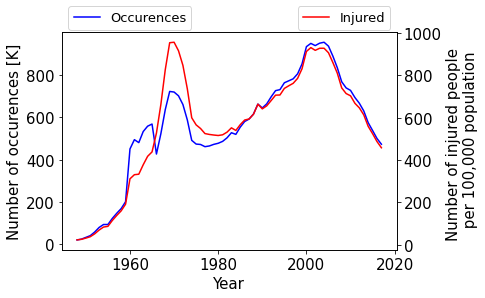

In [23]:
fig, ax1 = plt.subplots()
ax1.plot(x,list(map(lambda i: i/1000,y)),label="Occurences", color="b")
ax2 = ax1.twinx()
ax2.plot(x_i,y_i,label="Injured", color="r")
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.legend(bbox_to_anchor=(0, 1.15),fontsize=13, loc='upper left')
ax2.legend(bbox_to_anchor=(1, 1.15),fontsize=13, loc='upper right')
ax1.set_xlabel("Year", fontsize=15)
ax1.set_ylabel("Number of occurences [K]", fontsize=15)
ax2.set_ylabel("Number of injured people \n per 100,000 population", fontsize=15)
plt.show()

# クレジット
「このサービスは、政府統計総合窓口(e-Stat)のAPI機能を使用していますが、サービスの内容は国によって保証されたものではありません。」  
(https://www.e-stat.go.jp/api/api-info/credit)